In [27]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [95]:
url='/home/kingos82/Fourthbrain/BoozAllen/CMAPSSData/train_FD001.txt'
column_names = [
  'Unit', 'Cycles', 'Altitude', 'Mach', 'TRA',
  'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
  's22', 's23']
X_train=pd.read_csv(url, sep= ' ', names=column_names)
url='/home/kingos82/Fourthbrain/BoozAllen/CMAPSSData/test_FD001.txt'
X_test=pd.read_csv(url, sep= ' ', names=column_names)


In [12]:
X_train['Unit'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [17]:
df_W_u = X_train.loc[(X_train.Unit == 5) & (X_train.Cycles == 1)]
df_W_u.reset_index(inplace=True, drop=True)
df_W_u
#labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet (T2) [°R]']
#plot_df_color_per_unit(df_W_u, W_var , labels, size=12, labelsize=19, name='flight_profile_DS02.png')

,Unit,Cycles,Altitude,Mach,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,s22,s23
0,5,1,0.0031,0.0002,100.0,518.67,641.77,1583.59,1395.26,14.62,...,8152.22,8.4102,0.03,393,2388,100.0,38.98,23.4468,NaN,NaN


In [21]:
X5=X_train.loc[X_train.Unit == 5]
X5

,Unit,Cycles,Altitude,Mach,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,s22,s23
847,5,1,0.0031,0.0002,100.0,518.67,641.77,1583.59,1395.26,14.62,...,8152.22,8.4102,0.03,393,2388,100.0,38.98,23.4468,NaN,NaN
848,5,2,0.0002,0.0003,100.0,518.67,642.42,1589.69,1394.88,14.62,...,8153.04,8.4053,0.03,392,2388,100.0,39.12,23.4075,NaN,NaN
849,5,3,0.0002,-0.0005,100.0,518.67,642.07,1582.45,1396.29,14.62,...,8148.42,8.3990,0.03,393,2388,100.0,39.18,23.3298,NaN,NaN
850,5,4,0.0017,-0.0004,100.0,518.67,642.08,1586.84,1397.94,14.62,...,8148.81,8.3876,0.03,390,2388,100.0,39.22,23.4306,NaN,NaN
851,5,5,-0.0007,0.0001,100.0,518.67,642.03,1581.45,1394.28,14.62,...,8147.69,8.4129,0.03,390,2388,100.0,39.17,23.3331,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,5,265,0.0028,-0.0003,100.0,518.67,643.80,1605.53,1424.57,14.62,...,8203.89,8.5410,0.03,395,2388,100.0,38.35,23.0857,NaN,NaN
1112,5,266,0.0000,-0.0002,100.0,518.67,643.38,1609.33,1434.40,14.62,...,8208.49,8.5254,0.03,398,2388,100.0,38.55,23.1621,NaN,NaN
1113,5,267,0.0018,0.0001,100.0,518.67,643.73,1609.41,1430.25,14.62,...,8206.86,8.5292,0.03,397,2388,100.0,38.49,23.0566,NaN,NaN
1114,5,268,0.0033,-0.0002,100.0,518.67,644.02,1608.65,1434.59,14.62,...,8215.19,8.5196,0.03,397,2388,100.0,38.52,23.1180,NaN,NaN


In [22]:
X5.describe()

,Unit,Cycles,Altitude,Mach,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,s22,s23
count,269.0,269.000000,269.000000,269.000000,269.0,269.00,269.000000,269.000000,269.000000,269.00,...,269.000000,269.000000,2.690000e+02,269.000000,269.0,269.0,269.000000,269.000000,0.0,0.0
mean,5.0,135.000000,0.000136,-0.000061,100.0,518.67,642.451970,1588.153271,1404.878439,14.62,...,8161.807844,8.425968,3.000000e-02,392.646840,2388.0,100.0,38.891078,23.336284,NaN,NaN
std,0.0,77.797815,0.002119,0.000279,0.0,0.00,0.551542,7.060648,9.782341,0.00,...,16.480153,0.038658,3.475914e-18,1.740057,0.0,0.0,0.187133,0.112705,NaN,NaN
min,5.0,1.000000,-0.006300,-0.000500,100.0,518.67,641.300000,1574.800000,1389.190000,14.62,...,8140.950000,8.353600,3.000000e-02,389.000000,2388.0,100.0,38.340000,23.019500,NaN,NaN
25%,5.0,68.000000,-0.001200,-0.000300,100.0,518.67,642.050000,1583.080000,1397.480000,14.62,...,8150.350000,8.401800,3.000000e-02,391.000000,2388.0,100.0,38.780000,23.267200,NaN,NaN
50%,5.0,135.000000,0.000200,-0.000100,100.0,518.67,642.360000,1586.870000,1402.350000,14.62,...,8155.120000,8.416200,3.000000e-02,392.000000,2388.0,100.0,38.930000,23.359900,NaN,NaN
75%,5.0,202.000000,0.001500,0.000100,100.0,518.67,642.730000,1591.760000,1410.490000,14.62,...,8168.650000,8.442900,3.000000e-02,394.000000,2388.0,100.0,39.020000,23.418100,NaN,NaN
max,5.0,269.000000,0.005500,0.000500,100.0,518.67,644.020000,1609.410000,1434.590000,14.62,...,8215.190000,8.541000,3.000000e-02,398.000000,2388.0,100.0,39.290000,23.550300,NaN,NaN


In [47]:
y=np.zeros(20631)
y[X_train.loc[X_train.Cycles==192].index]=1
ma

1.0

In [49]:
X_train.shape
sum(y[y==1])

62.0

In [56]:
max_cyc_index=[]
for i in X_train['Unit'].unique():
    j=max(X_train.loc[(X_train.Unit == i)]['Cycles'])
    max_cyc_index.append(X_train.loc[(X_train.Unit==i) & (X_train.Cycles==j)].index)


max_cyc_index

#max cycles = 192
    

[Int64Index([191], dtype='int64'),
 Int64Index([478], dtype='int64'),
 Int64Index([657], dtype='int64'),
 Int64Index([846], dtype='int64'),
 Int64Index([1115], dtype='int64'),
 Int64Index([1303], dtype='int64'),
 Int64Index([1562], dtype='int64'),
 Int64Index([1712], dtype='int64'),
 Int64Index([1913], dtype='int64'),
 Int64Index([2135], dtype='int64'),
 Int64Index([2375], dtype='int64'),
 Int64Index([2545], dtype='int64'),
 Int64Index([2708], dtype='int64'),
 Int64Index([2888], dtype='int64'),
 Int64Index([3095], dtype='int64'),
 Int64Index([3304], dtype='int64'),
 Int64Index([3580], dtype='int64'),
 Int64Index([3775], dtype='int64'),
 Int64Index([3933], dtype='int64'),
 Int64Index([4167], dtype='int64'),
 Int64Index([4362], dtype='int64'),
 Int64Index([4564], dtype='int64'),
 Int64Index([4732], dtype='int64'),
 Int64Index([4879], dtype='int64'),
 Int64Index([5109], dtype='int64'),
 Int64Index([5308], dtype='int64'),
 Int64Index([5464], dtype='int64'),
 Int64Index([5629], dtype='int64

In [96]:
max_cyc_test=[]
for i in X_test['Unit'].unique():
    j=max(X_test.loc[(X_test.Unit == i)]['Cycles'])
    max_cyc_test.append(X_test.loc[(X_test.Unit==i) & (X_test.Cycles==j)].index)


max_cyc_test

[Int64Index([30], dtype='int64'),
 Int64Index([79], dtype='int64'),
 Int64Index([205], dtype='int64'),
 Int64Index([311], dtype='int64'),
 Int64Index([409], dtype='int64'),
 Int64Index([514], dtype='int64'),
 Int64Index([674], dtype='int64'),
 Int64Index([840], dtype='int64'),
 Int64Index([895], dtype='int64'),
 Int64Index([1087], dtype='int64'),
 Int64Index([1170], dtype='int64'),
 Int64Index([1387], dtype='int64'),
 Int64Index([1582], dtype='int64'),
 Int64Index([1628], dtype='int64'),
 Int64Index([1704], dtype='int64'),
 Int64Index([1817], dtype='int64'),
 Int64Index([1982], dtype='int64'),
 Int64Index([2115], dtype='int64'),
 Int64Index([2250], dtype='int64'),
 Int64Index([2434], dtype='int64'),
 Int64Index([2582], dtype='int64'),
 Int64Index([2621], dtype='int64'),
 Int64Index([2751], dtype='int64'),
 Int64Index([2937], dtype='int64'),
 Int64Index([2985], dtype='int64'),
 Int64Index([3061], dtype='int64'),
 Int64Index([3201], dtype='int64'),
 Int64Index([3359], dtype='int64'),
 In

In [76]:
y_train=np.zeros(X_train.shape[0])
y_train[max_cyc_index]=1
y_train.dtype

dtype('float64')

In [98]:
y_test=np.zeros(X_test.shape[0])
y_test[max_cyc_test]=1
y_test.shape

(13096,)

In [88]:
X_reduced0=X_train.drop(['Unit', 'Cycles', 's22', 's23'], axis=1)

In [99]:
X_test_reduced0=X_test.drop(['Unit', 'Cycles', 's22', 's23'], axis=1)

In [91]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_reduced0)

pca=PCA(n_components=20)
X_reduced=pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(np.cumsum(pca.explained_variance_ratio_))


[5.30980118e-01 1.23458027e-01 5.95486095e-02 5.83626502e-02
 5.65927553e-02 2.43380037e-02 2.16593128e-02 2.04885375e-02
 1.80019096e-02 1.70451126e-02 1.50219453e-02 1.21262984e-02
 1.15254140e-02 1.03868075e-02 1.01471885e-02 8.59537077e-03
 1.72193938e-03 5.19754106e-34 2.17521109e-34 3.71447496e-35]
[4.31542656e+02 2.08086673e+02 1.44517491e+02 1.43071161e+02
 1.40885085e+02 9.23904488e+01 8.71579360e+01 8.47695893e+01
 7.94591452e+01 7.73186991e+01 7.25851350e+01 6.52151842e+01
 6.35788792e+01 6.03567215e+01 5.96564581e+01 5.49056336e+01
 2.45750002e+01 1.35015480e-14 8.73444481e-15 3.60938590e-15]
[0.53098012 0.65443814 0.71398675 0.7723494  0.82894216 0.85328016
 0.87493948 0.89542801 0.91342992 0.93047504 0.94549698 0.95762328
 0.96914869 0.9795355  0.98968269 0.99827806 1.         1.
 1.         1.        ]


In [92]:
X_reduced

array([[-2.95277923e+00, -4.32155642e-01, -1.17284298e+00, ...,
         1.14553185e-16, -3.09232037e-17, -4.95955568e-17],
       [-2.36366944e+00, -7.86872025e-01, -1.32349195e-01, ...,
        -4.47478448e-17,  1.78067247e-17,  5.01383554e-17],
       [-2.97866502e+00, -5.52465588e-01, -5.30408057e-01, ...,
        -5.16463951e-15,  6.42655462e-15,  1.09183880e-15],
       ...,
       [ 8.00015654e+00, -7.25253139e-01,  3.15750753e-02, ...,
         2.46033540e-18,  2.45138075e-18,  9.97143292e-20],
       [ 7.74525381e+00, -7.82121658e-01,  3.03729122e-01, ...,
         6.85553176e-18,  2.95475973e-19,  9.47304132e-19],
       [ 7.84481455e+00, -1.32230066e+00, -2.34007958e+00, ...,
         1.91667873e-18,  1.59137945e-18,  2.61400400e-19]])

In [78]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])
    
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])
    



In [86]:
X_reduced

PCA(n_components=20)

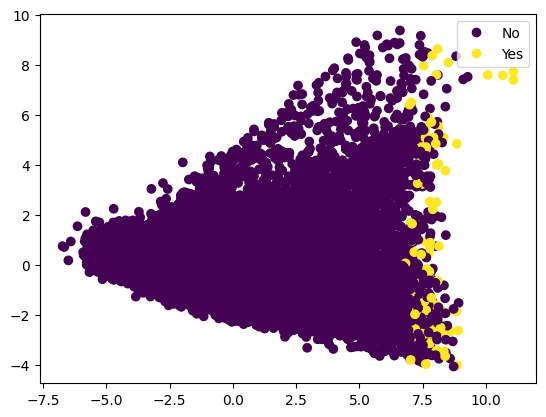

In [93]:
visualize_2pcs(X_reduced, y_train)

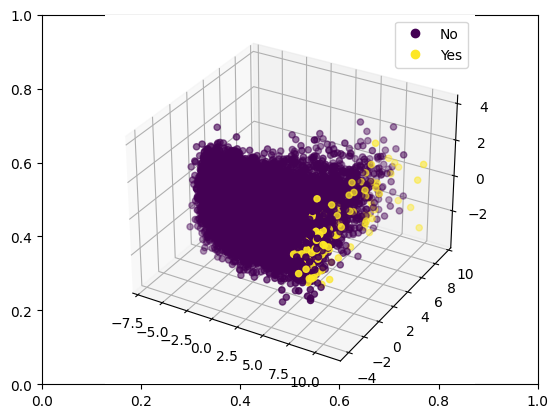

In [94]:
visualize_3pcs(X_reduced, y_train)

In [100]:
# YOUR CODE HERE (imports!)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

In [102]:
pp=make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))

pp.fit(X_reduced0, y_train)
y_test_hat=pp.predict(X_test_reduced0)
print(classification_report(y_test, y_test_hat, digits=6))  

              precision    recall  f1-score   support

         0.0   0.992438  0.999769  0.996090     12996
         1.0   0.250000  0.010000  0.019231       100

    accuracy                       0.992211     13096
   macro avg   0.621219  0.504885  0.507660     13096
weighted avg   0.986769  0.992211  0.988631     13096



/home/kingos82/anaconda3/envs/BA/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
pp0=make_pipeline(LogisticRegression(class_weight='balanced'))

pp0.fit(X_reduced0, y_train)
y_test_hat0=pp0.predict(X_test_reduced0)
print(classification_report(y_test, y_test_hat0, digits=6))  

              precision    recall  f1-score   support

         0.0   0.992808  0.998461  0.995626     12996
         1.0   0.230769  0.060000  0.095238       100

    accuracy                       0.991295     13096
   macro avg   0.611789  0.529231  0.545432     13096
weighted avg   0.986989  0.991295  0.988751     13096



/home/kingos82/anaconda3/envs/BA/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
